<a href="https://colab.research.google.com/github/Alberto-Pedraza/Tarea5rna/blob/main/Tarea5AlbertoP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 1
Diseñar una capa en Keras que transforme imágenes a color en escala de grises. Se puede utilizar cualquier base de datos para hacer las pruebas. (Sólo se pide la capa, no hay entrenamiento que realizar)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class Togreyscale(tf.keras.layers.Layer):
  def __init__(self,**kwargs):
    super(Togreyscale,self).__init__(**kwargs)

  def build(self,input_shape):
    super(Togreyscale,self).build(input_shape)

  def call(self,inputs):
    gscaleimg = tf.reduce_sum(inputs*tf.constant([0.299, 0.587, 0.114], dtype=tf.float32), axis=-1, keepdims=True)
    return gscaleimg

  def compute_output_shape(self, input_shape):
        return input_shape[:-1] + (1,)

In [ ]:
!wget https://dagshub.com/jorgevc/Gatos-y-Perros/raw/24eaabd8ca81ed89f780138c1e3955ccd1f3d155/data/DogsCats.zip

--2023-10-20 21:05:30--  https://dagshub.com/jorgevc/Gatos-y-Perros/raw/24eaabd8ca81ed89f780138c1e3955ccd1f3d155/data/DogsCats.zip
Resolving dagshub.com (dagshub.com)... 35.186.200.224
Connecting to dagshub.com (dagshub.com)|35.186.200.224|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘DogsCats.zip’

DogsCats.zip            [    <=>             ] 545.56M  62.8MB/s    in 7.9s    

2023-10-20 21:05:39 (69.3 MB/s) - ‘DogsCats.zip’ saved [572061537]



In [ ]:
!unzip DogsCats.zip

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: train/cat/cat.1.jpg     
  inflating: train/cat/cat.1000.jpg  
  inflating: train/cat/cat.1023.jpg  
  inflating: train/cat/cat.1038.jpg  
  inflating: train/cat/cat.1040.jpg  
  inflating: train/cat/cat.1056.jpg  
  inflating: train/cat/cat.1059.jpg  
  inflating: train/cat/cat.1070.jpg  
  inflating: train/cat/cat.1078.jpg  
  inflating: train/cat/cat.1080.jpg  
  inflating: train/cat/cat.1109.jpg  
  inflating: train/cat/cat.1118.jpg  
  inflating: train/cat/cat.1133.jpg  
  inflating: train/cat/cat.1139.jpg  
  inflating: train/cat/cat.1158.jpg  
  inflating: train/cat/cat.1163.jpg  
  inflating: train/cat/cat.1165.jpg  
  inflating: train/cat/cat.1171.jpg  
  inflating: train/cat/cat.1175.jpg  
  inflating: train/cat/cat.1195.jpg  
  inflating: train/cat/cat.1209.jpg  
  inflating: train/cat/cat.1217.jpg  
  inflating: train/cat/cat.1232.jpg  
  inflating: train/cat/cat.1233.jpg  
  inflating: train/ca

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, Dropout,Activation,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
ih, iw = 150, 150 #tamano de la imagen
input_shape = (ih, iw, 3) #forma de la imagen: alto ancho y numero de canales

#train_dir = 'data/minitrain' #directorio de entrenamiento
#test_dir = 'data/minitest' #directorio de prueba
train_dir = 'train' #directorio de entrenamiento
test_dir = 'test' #directorio de prueba


num_class = 2 #cuantas clases
epochs = 30 #cuantas veces entrenar. En cada epoch hace una mejora en los parametros

batch_size = 50 #batch para hacer cada entrenamiento. Lee 50 'batch_size' imagenes antes de actualizar los parametros. Las carga a memoria
num_train = 20000 #numero de imagenes en train
num_test = 5000 #numero de imagenes en test


epoch_steps = num_train // batch_size
test_steps = num_test // batch_size


gentrain = ImageDataGenerator(rescale=1. / 255.) #indica que reescale cada canal con valor entre 0 y 1.


train = gentrain.flow_from_directory(train_dir,
                batch_size=batch_size,
                target_size=(iw, ih),
                class_mode='binary')

gentest = ImageDataGenerator(rescale=1. / 255)

test = gentest.flow_from_directory(test_dir,
                batch_size=batch_size,
                target_size=(iw, ih),
                class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Togreyscale(input_shape=(ih, iw,3)))
model.add(Conv2D(10, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(10, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(20, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 togreyscale_6 (Togreyscale  (None, 150, 150, 1)       0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 10)      100       
                                                                 
 activation (Activation)     (None, 148, 148, 10)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 10)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 10)        910       
                                                                 
 activation_1 (Activation)   (None, 72, 72, 10)       

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.fit_generator(
                train,
                steps_per_epoch=epoch_steps,
                epochs=epochs,
                validation_data=test,
                validation_steps=test_steps
                )

<ipython-input-57-efff00155d8a>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/30
400/400 [==============================] - 291s 723ms/step - loss: 0.6193 - accuracy: 0.6491 - val_loss: 0.6127 - val_accuracy: 0.6638
Epoch 2/30
400/400 [==============================] - 300s 748ms/step - loss: 0.5326 - accuracy: 0.7340 - val_loss: 0.5203 - val_accuracy: 0.7370
Epoch 3/30
400/400 [==============================] - 303s 757ms/step - loss: 0.4863 - accuracy: 0.7671 - val_loss: 0.4825 - val_accuracy: 0.7628
Epoch 4/30
400/400 [==============================] - 306s 766ms/step - loss: 0.4529 - accuracy: 0.7899 - val_loss: 0.4609 - val_accuracy: 0.7786
Epoch 5/30
400/400 [==============================] - 298s 746ms/step - loss: 0.4167 - accuracy: 0.8095 - val_loss: 0.5159 - val_accuracy: 0.7558
Epoch 6/30
400/400 [==============================] - 299s 747ms/step - loss: 0.3839 - accuracy: 0.8270 - val_loss: 0.5147 - val_accuracy: 0.7498
Epoch 7/30
400/400 [==============================] - 299s 746ms/step - loss: 0.3432 - accuracy: 0.8470 - val_loss: 0.4468 -

KeyboardInterrupt: ignored

In [ ]:
#%cd train/dog

/content/train


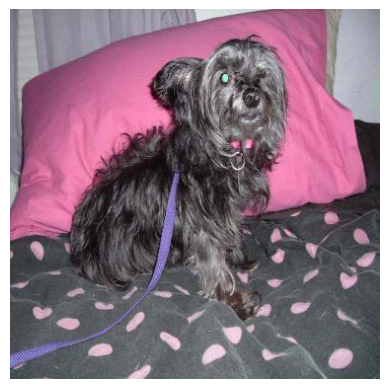

In [ ]:
"""
import matplotlib.pyplot as plt

image = tf.io.read_file('dog.0.jpg')
image = tf.io.decode_jpeg(image,channels=3)

image = tf.image.convert_image_dtype(image, tf.float32)  # Normalize pixel values to the range [0, 1]
image = tf.image.resize(image, [375, 375])  # Resize to 150x150
#image = tf.convert_to_tensor(image)

plt.imshow(image)
plt.axis('off')  # Hide axis numbers and ticks
plt.show()
#image
"""

# Ejercicio 2

Entrenar una red para que reproduzca las siguientes funciones en el intervalo [-1,1]. Graficar la solución de la red en conjunto con la gráfica de la función.

a) $3\, sin(\pi x)$

b) $1\,+\, 2x\, +\, 4x^3$

## Inciso a)

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from matplotlib import pyplot as plt
import numpy as np
import math

In [2]:
loss_tracker = keras.metrics.Mean(name="loss")
class Funsola(Sequential):
    @property
    def metrics(self):
        return [loss_tracker] #igual cambia el loss_tracker

    def train_step(self, data):
        batch_size =500 #Calibra la resolucion
        x = tf.random.uniform((batch_size,1), minval=-1, maxval=1) #Los valores de min y max se refieren al intervalo en el que se calcula la solución
        f = 3.*tf.math.sin(tf.constant(math.pi)*x)  #Función a ajustar

        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)
            #loss = keras.losses.mean_squared_error(y_pred,eq)
            loss = tf.math.reduce_mean(tf.math.square(y_pred-f)) #el módulo reduce_mean hace que el resultado sea un número real y no un vector

        grads = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        #actualiza metricas
        loss_tracker.update_state(loss)

        return {"loss": loss_tracker.result()}

In [3]:
model = Funsola()
model.add(Dense(600,activation='tanh', input_shape=(1,)))
#model.add(Dense(200,activation='tanh'))
model.add(Dense(400,activation='relu'))
model.add(Dense(1)) #No hay función de activación para que sea ua transformación lineal directa y pueda adoptar cualquier valor de salida

model.summary()

Model: "funsola"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 600)               1200      
                                                                 
 dense_1 (Dense)             (None, 400)               240400    
                                                                 
 dense_2 (Dense)             (None, 1)                 401       
                                                                 
Total params: 242001 (945.32 KB)
Trainable params: 242001 (945.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


dict_keys(['loss'])


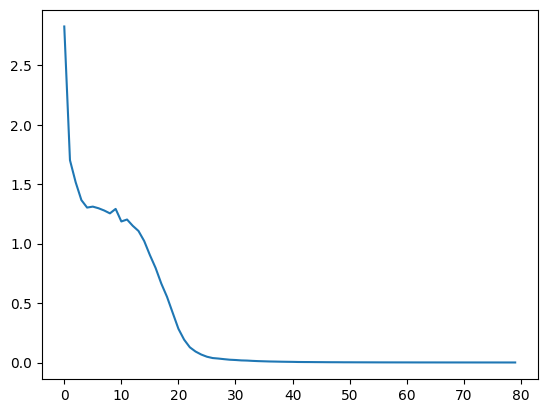

In [4]:
model.compile(optimizer=Adam(learning_rate=0.0005), metrics=['loss'])

x=tf.linspace(-1,1,400)
history = model.fit(x,epochs=80,verbose=0)

print(history.history.keys())
plt.plot(history.history["loss"])

13/13 [==============================] - 0s 3ms/step


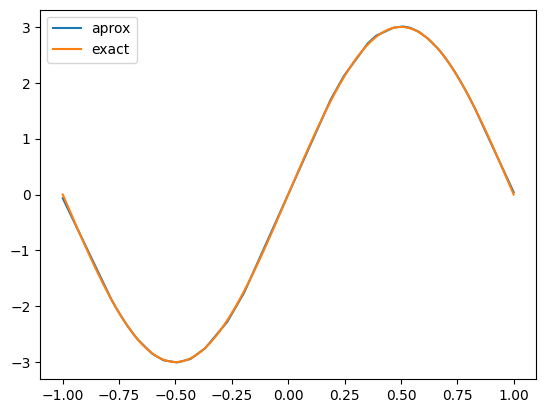

In [5]:
a=model.predict(x)
plt.plot(x,a,label="aprox")
plt.plot(x, 3.*tf.math.sin(math.pi*x), label="exact")
plt.legend()
plt.show()

## Inciso b)

In [73]:
loss_tracker = keras.metrics.Mean(name="loss")
class Funsolb(Sequential):
    @property
    def metrics(self):
        return [loss_tracker] #igual cambia el loss_tracker

    def train_step(self, data):
        batch_size =400 #Calibra la resolucion
        x = tf.random.uniform((batch_size,1), minval=-1, maxval=1) #Los valores de min y max se refieren al intervalo en el que se calcula la solución
        f = 1. + 2.*x + 4.*tf.math.pow(x,3)  #Función a ajustar

        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)
            #loss = keras.losses.mean_squared_error(y_pred,eq)
            loss = tf.math.reduce_mean(tf.math.square(y_pred-f)) #el módulo reduce_mean hace que el resultado sea un número real y no un vector

        grads = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        #actualiza metricas
        loss_tracker.update_state(loss)

        return {"loss": loss_tracker.result()}

In [80]:
modelpol = Funsolb()
modelpol.add(Dense(600,activation='tanh', input_shape=(1,)))
#modelpol.add(Dense(200,activation='tanh'))
modelpol.add(Dense(200,activation='relu'))
modelpol.add(Dense(1)) #No hay función de activación para que sea una transformación lineal directa y pueda adoptar cualquier valor de salida

modelpol.summary()

Model: "funsolb_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 600)               1200      
                                                                 
 dense_73 (Dense)            (None, 200)               120200    
                                                                 
 dense_74 (Dense)            (None, 1)                 201       
                                                                 
Total params: 121601 (475.00 KB)
Trainable params: 121601 (475.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


dict_keys(['loss'])


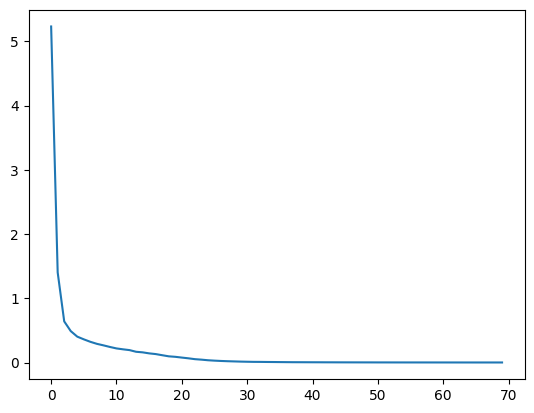

In [81]:
modelpol.compile(optimizer=Adam(learning_rate=0.0005), metrics=['loss'])

x=tf.linspace(-1,1,400)
history = modelpol.fit(x,epochs=70,verbose=0)

print(history.history.keys())
plt.plot(history.history["loss"])

13/13 [==============================] - 0s 3ms/step


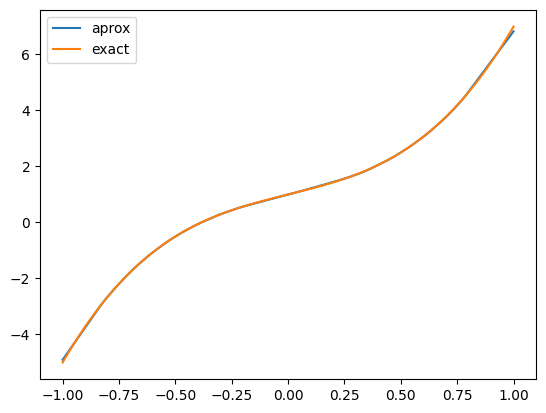

In [82]:
b=modelpol.predict(x)
plt.plot(x,b,label="aprox")
plt.plot(x, 1. + 2.*x + 4.*tf.math.pow(x,3), label="exact")
plt.legend()
plt.show()

# Ejercicio 3

Diseñar una capa entrenable que represente un polinomio grado 3: $f(x)=a_0 + a_1x+a_2x^2 + a_3x^3$. Los parámetros entrenables son los coeficientes $a_0$, $a_1$, $a_2$ y $a_3$. Posteriormente entrenarla para ajustarla a la fución $f(x)=\cos(2x)$ en el intervalo $[-1,1]$.

In [10]:
loss_tracker = keras.metrics.Mean(name="loss")
class Funsolcos(Sequential):
    @property
    def metrics(self):
        return [loss_tracker] #igual cambia el loss_tracker

    def train_step(self, data):
        batch_size =2000 #Calibra la resolucion
        x = tf.random.uniform((batch_size,1), minval=-1, maxval=1)
        f = tf.math.cos(2.*x)

        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)
            #loss = keras.losses.mean_squared_error(y_pred,f)
            loss = tf.math.reduce_mean(tf.math.square(y_pred-f))

        grads = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        #actualiza metricas
        loss_tracker.update_state(loss)

        return {"loss": loss_tracker.result()}

class PolTransform(tf.keras.layers.Layer):
    def __init__(self, num_outputs):
        super(PolTransform,self).__init__()
        self.num_outputs = num_outputs

        self.coef = tf.range(0.,self.num_outputs)

        self.kernel = self.add_weight("kernel",
                                shape=[self.num_outputs])

    def call(self, inputs):
        inputs = tf.convert_to_tensor(inputs)
        if (inputs.shape == ()):
            inputs=(inputs,)
        elif (len(inputs.shape)==1):
            inputs=tf.expand_dims(inputs, axis=1)
        batch = tf.shape(inputs)[0]
        self.coef_b = tf.ones([batch,1])*self.coef
        args = tf.math.pow(inputs,self.coef_b)
        #modes = tf.math.sin(args)
        res = tf.tensordot(args,self.kernel,1)
        return tf.expand_dims(res, axis=1)

In [20]:
model_P = Funsolcos()
model_P.add(PolTransform(4)) #Para polinomio de orden n, se utiliza PolTransform(n+1)
model_P.build(input_shape=(1,))
model_P.summary()

Model: "funsolcos_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 pol_transform_4 (PolTransf  (1, 1)                    4         
 orm)                                                            
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


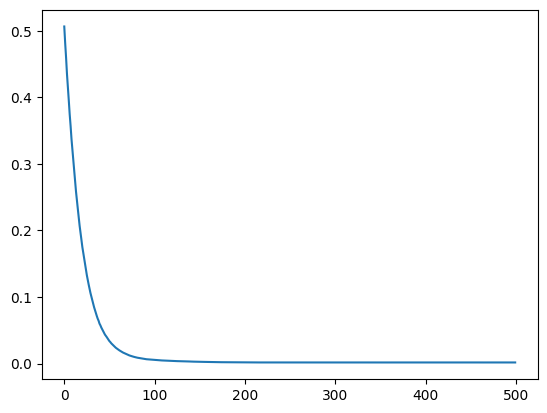

In [21]:
model_P.compile(optimizer=Adam(learning_rate=0.0005), metrics=['loss'])

x_p=tf.linspace(-1,1,1000)
historypol = model_P.fit(x_p,epochs=500,verbose=0)

plt.plot(historypol.history["loss"])

32/32 [==============================] - 0s 1ms/step


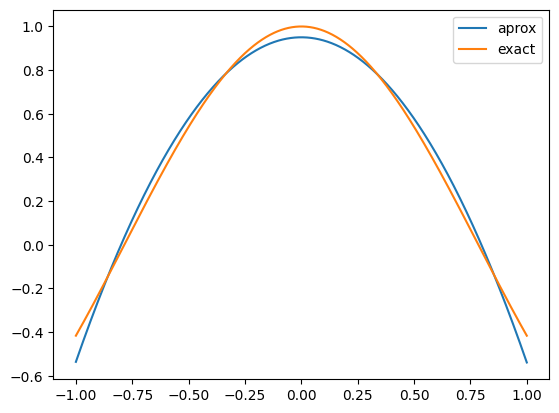

In [22]:
poli3=model_P.predict(x_p)
plt.plot(x_p,poli3,label="aprox")
plt.plot(x_p,tf.math.cos(2.*x_p),label="exact")
plt.legend()
plt.show()

In [19]:
model_P.layers[0].trainable_weights

[<tf.Variable 'kernel:0' shape=(4,) dtype=float32, numpy=
 array([ 9.5108992e-01, -9.8506978e-04, -1.4891771e+00, -7.0208905e-04],
       dtype=float32)>]

# Ejercicio 4

Entrenar una red neuronal que dé la solución de las siguientes ecuaciones diferenciales en el intervalo $[-5,5]$. Graficar la solución numérica junto con la solución analítica.

a) $xy'+y=x^2\cos(x) \qquad$  con $\quad y(0)=0$

b) $\frac{\mathrm{d}^2y}{\mathrm{d}x^2}=-y \qquad$ con $\qquad y(0)=1$ , $y(0)=-0.5$

## Inciso a)

La solución exacta a la ecuación diferencial es:

$$y(x)=\frac{(x^2-2)\sin(x)+C}{x}+2\cos(x)$$

donde utilizamos $C=0$ porque, a pesar de que se indetermina en $y(0)$ es donde converge a las condiciones iniciales del problema.

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Activation
from tensorflow.keras.optimizers import RMSprop, Adam

from matplotlib import pyplot as plt
import numpy as np

In [32]:
class ODEsolver1(Sequential):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.loss_tracker = keras.metrics.Mean(name="loss")
        self.mse = tf.keras.losses.MeanSquaredError()

    @property
    def metrics(self):
      return [self.loss_tracker]

    def train_step(self, data):
         batch_size = tf.shape(data)[0]
         min = tf.cast(tf.reduce_min(data),tf.float32)
         max = tf.cast(tf.reduce_max(data),tf.float32)
         x = tf.random.uniform((batch_size,1), minval=min, maxval=max)

         with tf.GradientTape() as tape:
             with tf.GradientTape() as tape2:
                 tape2.watch(x)
                 y_pred = self(x, training=True)
             dy = tape2.gradient(y_pred, x) #derivada del modelo con respecto a entradas x
             x_o = tf.zeros((batch_size,1)) #valor de x en condicion inicial x_0=0
             y_o = self(x_o,training=True) #valor del modelo en en x_0
             eq = x*dy + y_pred - x*x*tf.math.cos(x) #Ecuacion diferencial evaluada en el modelo. Queremos que sea muy pequeno
             ic = 0. #valor que queremos para la condicion inicial o el modelo en x_0
             loss = self.mse(0., eq) + self.mse(y_o,ic)

        # Apply grads
         grads = tape.gradient(loss, self.trainable_variables)
         self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
        #update metrics
         self.loss_tracker.update_state(loss)
        # Return a dict mapping metric names to current value
         return {"loss": self.loss_tracker.result()}

In [53]:
model_a = ODEsolver1()

model_a.add(Dense(200, activation='tanh', input_shape=(1,)))
model_a.add(Dense(50, activation='tanh'))
model_a.add(Dense(1))

model_a.summary()

Model: "od_esolver1_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 200)               400       
                                                                 
 dense_25 (Dense)            (None, 50)                10050     
                                                                 
 dense_26 (Dense)            (None, 1)                 51        
                                                                 
Total params: 10501 (41.02 KB)
Trainable params: 10501 (41.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


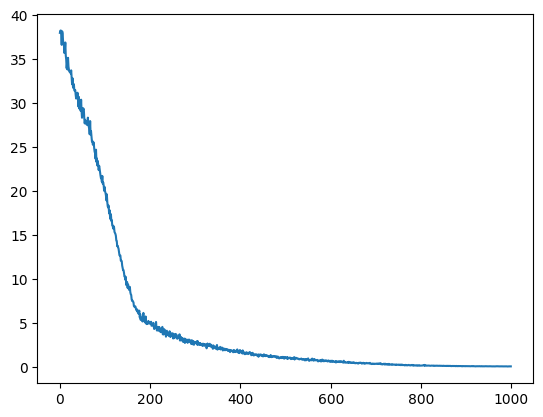

In [54]:
model_a.compile(optimizer=RMSprop(learning_rate=0.00001),metrics=['loss'])

x=tf.linspace(-5,5,4000)
history_a = model_a.fit(x,epochs=1000,verbose=0)
plt.plot(history_a.history["loss"])

7/7 [==============================] - 0s 3ms/step


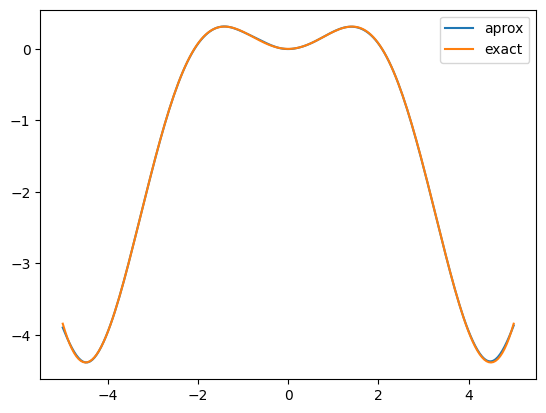

In [55]:
x_testv = tf.linspace(-5,5,200)
a=model_a.predict(x_testv)
plt.plot(x_testv,a,label="aprox")
plt.plot(x_testv,(1/x_testv)*(x_testv*x_testv-2)*tf.math.sin(x_testv) + 2.*tf.math.cos(x_testv),label="exact")
plt.legend()
plt.show()

## Inciso b)

La solución exacta es:
$$y(x)=C_1\sin(x) + C_2\cos(x)$$
para cumplir con la primer condición inicial los valores de las constantes son $C_1=0$ y $C_2=1$.

In [3]:
class ODEsolverb1(Sequential):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.loss_tracker = keras.metrics.Mean(name="loss")
        self.mse = tf.keras.losses.MeanSquaredError()

    @property
    def metrics(self):
      return [self.loss_tracker]

    def train_step(self, data):
         batch_size = tf.shape(data)[0]
         min = tf.cast(tf.reduce_min(data),tf.float32)
         max = tf.cast(tf.reduce_max(data),tf.float32)
         x = tf.random.uniform((batch_size,1), minval=min, maxval=max)

         with tf.GradientTape() as tape:
             with tf.GradientTape(persistent=True) as tape2:
                  tape2.watch(x)
                  with tf.GradientTape() as tape3:
                      tape3.watch(x)
                      y_pred = self(x, training=True)
                  dy = tape3.gradient(y_pred, x) #derivada del modelo con respecto a entradas x
             ddy = tape2.gradient(dy,x)
             x_o = tf.zeros((batch_size,1)) #valor de x en condicion inicial x_0=0
             y_o = self(x_o,training=True) #valor del modelo en en x_0
             eq = ddy + y_pred #Ecuacion diferencial evaluada en el modelo. Queremos que sea muy pequeno
             ic = 1. #valor que queremos para la condicion inicial o el modelo en x_0
             loss = self.mse(0., eq) + self.mse(y_o,ic)

        # Apply grads
         grads = tape.gradient(loss, self.trainable_variables)
         self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
        #update metrics
         self.loss_tracker.update_state(loss)
        # Return a dict mapping metric names to current value
         return {"loss": self.loss_tracker.result()}

In [21]:
model_b1 = ODEsolverb1()

model_b1.add(Dense(100, activation='tanh', input_shape=(1,)))
model_b1.add(Dense(50, activation='tanh'))
model_b1.add(Dense(1))

model_b1.summary()

Model: "od_esolverb1_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 100)               200       
                                                                 
 dense_19 (Dense)            (None, 50)                5050      
                                                                 
 dense_20 (Dense)            (None, 1)                 51        
                                                                 
Total params: 5301 (20.71 KB)
Trainable params: 5301 (20.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


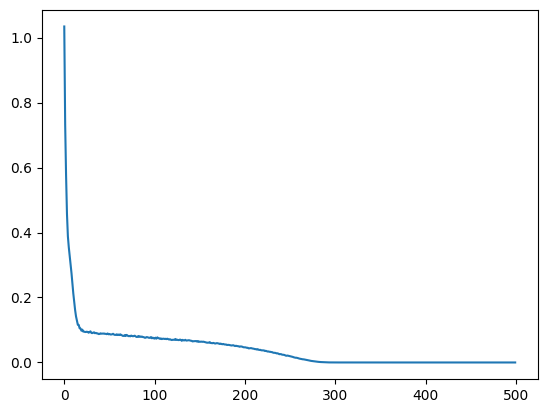

In [22]:
model_b1.compile(optimizer=RMSprop(learning_rate=0.00005),metrics=['loss'])

x=tf.linspace(-5,5,2500)
history_b1 = model_b1.fit(x,epochs=500,verbose=0)
plt.plot(history_b1.history["loss"])

7/7 [==============================] - 0s 3ms/step


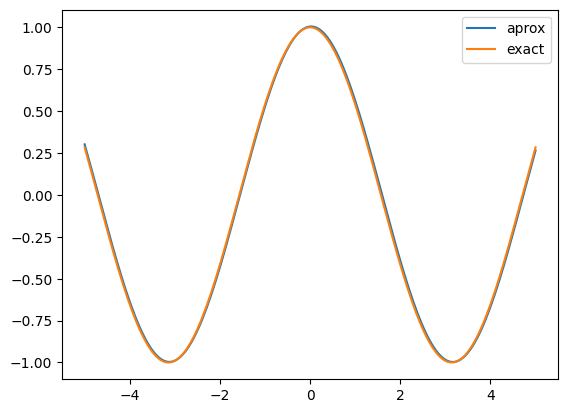

In [23]:
x_testb1 = tf.linspace(-5,5,200)
b1=model_b1.predict(x_testb1)
plt.plot(x_testb1,b1,label="aprox")
plt.plot(x_testb1,tf.math.cos(x_testb1),label="exact")
plt.legend()
plt.show()

Para cumplir con las segundas condiciones iniciales los valores de las constantes son $C_1=0$ y $C_2=-0.5$

In [26]:
class ODEsolverb2(Sequential):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.loss_tracker = keras.metrics.Mean(name="loss")
        self.mse = tf.keras.losses.MeanSquaredError()

    @property
    def metrics(self):
      return [self.loss_tracker]

    def train_step(self, data):
         batch_size = tf.shape(data)[0]
         min = tf.cast(tf.reduce_min(data),tf.float32)
         max = tf.cast(tf.reduce_max(data),tf.float32)
         x = tf.random.uniform((batch_size,1), minval=min, maxval=max)

         with tf.GradientTape() as tape:
             with tf.GradientTape(persistent=True) as tape2:
                  tape2.watch(x)
                  with tf.GradientTape() as tape3:
                      tape3.watch(x)
                      y_pred = self(x, training=True)
                  dy = tape3.gradient(y_pred, x) #derivada del modelo con respecto a entradas x
             ddy = tape2.gradient(dy,x)
             x_o = tf.zeros((batch_size,1)) #valor de x en condicion inicial x_0=0
             y_o = self(x_o,training=True) #valor del modelo en en x_0
             eq = ddy + y_pred #Ecuacion diferencial evaluada en el modelo. Queremos que sea muy pequeno
             ic = -0.5 #valor que queremos para la condicion inicial o el modelo en x_0
             loss = self.mse(0., eq) + self.mse(y_o,ic)

        # Apply grads
         grads = tape.gradient(loss, self.trainable_variables)
         self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
        #update metrics
         self.loss_tracker.update_state(loss)
        # Return a dict mapping metric names to current value
         return {"loss": self.loss_tracker.result()}

In [27]:
model_b2 = ODEsolverb2()

model_b2.add(Dense(100, activation='tanh', input_shape=(1,)))
model_b2.add(Dense(50, activation='tanh'))
model_b2.add(Dense(1))

model_b2.summary()

Model: "od_esolverb2_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 100)               200       
                                                                 
 dense_25 (Dense)            (None, 50)                5050      
                                                                 
 dense_26 (Dense)            (None, 1)                 51        
                                                                 
Total params: 5301 (20.71 KB)
Trainable params: 5301 (20.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


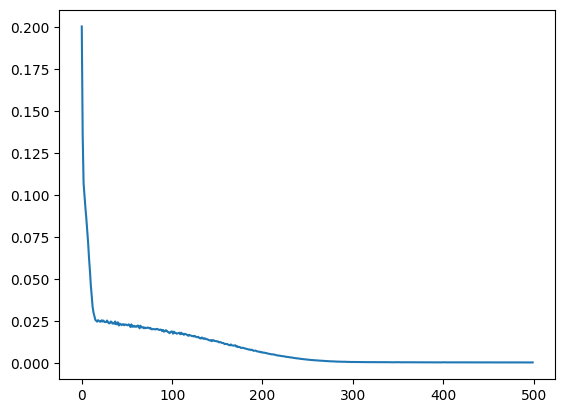

In [28]:
model_b2.compile(optimizer=RMSprop(learning_rate=0.00005),metrics=['loss'])

x=tf.linspace(-5,5,2500)
history_b2 = model_b2.fit(x,epochs=500,verbose=0)
plt.plot(history_b2.history["loss"])

7/7 [==============================] - 0s 3ms/step


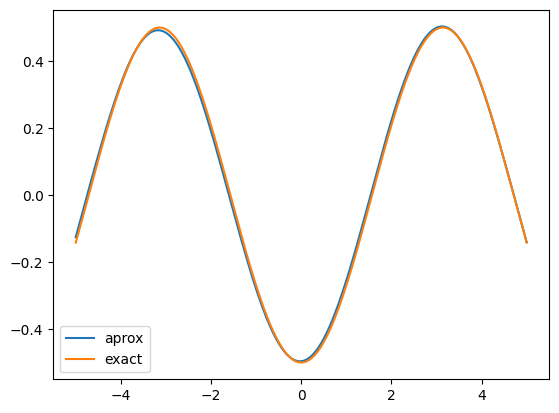

In [29]:
x_testb2 = tf.linspace(-5,5,200)
b2=model_b2.predict(x_testb2)
plt.plot(x_testb2,b2,label="aprox")
plt.plot(x_testb2,-0.5*tf.math.cos(x_testb2),label="exact")
plt.legend()
plt.show()